In [1]:
#https://qiita.com/yshi12/items/26771139672d40a0be32(グラフ)
from sklearn import datasets
import pandas as pd
df = pd.read_csv('isigaki_miyako_iriomote_wavedata/isigaki_test2.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.loc[:, 1:].values
#print(X)
y = df.loc[:, 0].values
df.keys()
df.head()
df.columns
df.columns = ["label","wind speed","temperature","precipitation amount","wave height"]
print(X)
df.head()

[[ 4.9  21.    4.5   2.1 ]
 [ 4.9  18.9   0.    1.9 ]
 [ 3.6  18.9   0.    1.55]
 ...
 [ 6.2  16.    2.    9.5 ]
 [ 6.1  17.3   7.5   9.  ]
 [ 5.4  19.3   3.5   9.  ]]


,label,wind speed,temperature,precipitation amount,wave height
0,navigation,4.9,21.0,4.5,2.10
1,navigation,4.9,18.9,0.0,1.90
2,navigation,3.6,18.9,0.0,1.55
3,navigation,3.5,21.2,0.0,1.00
4,navigation,6.0,17.6,5.0,3.00


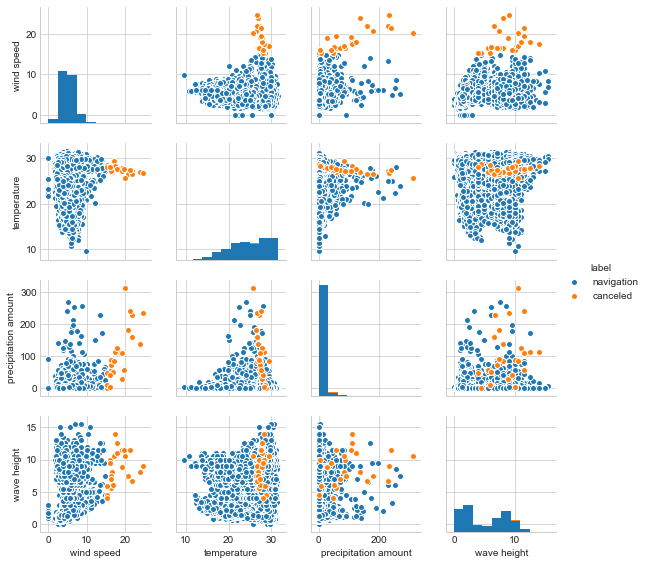

In [2]:
#散布図行列
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

sns.pairplot(df, hue = 'label', size =2) 

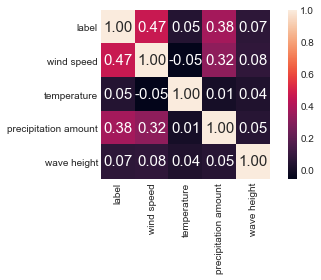

,label,wind speed,temperature,precipitation amount,wave height
0,0,4.9,21.0,4.5,2.10
1,0,4.9,18.9,0.0,1.90
2,0,3.6,18.9,0.0,1.55
3,0,3.5,21.2,0.0,1.00
4,0,6.0,17.6,5.0,3.00


In [3]:
#相関行列
import numpy as np

size_mapping = {'navigation': 0, 'canceled': 1}
df['label'] = df['label'].map(size_mapping)

cols = ['label','wind speed','temperature','precipitation amount','wave height']

cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()
df.head()

In [4]:
#データの分割（テスト用とトレーニング用）
from sklearn.model_selection import train_test_split

df = pd.read_csv('isigaki_miyako_iriomote_wavedata/isigaki_test.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.loc[:, [1,4]].values
#print(X)
y = df.loc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y[0 1]:', np.bincount(y))
print('Labels counts in y_train[0 1]:', np.bincount(y_train))
print('Labels counts in y_test[0 1]:', np.bincount(y_test))

Labels counts in y[0 1]: [4723   25]
Labels counts in y_train[0 1]: [3778   20]
Labels counts in y_test[0 1]: [945   5]


In [5]:
#標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[-0.77081914  1.38505558]
 [-1.06589257  2.52798994]
 [-0.52492461  1.52792238]
 ...
 [-0.57410352 -1.00081989]
 [ 0.55701132 -1.12940001]
 [-0.37738789  0.9564552 ]]


[1] score: 1.00000
[2] score: 1.00000
[3] score: 1.00000
[4] score: 1.00000
[5] score: 1.00000
[6] score: 1.00000
[7] score: 1.00000
[8] score: 1.00000
[9] score: 1.00000
[10] score: 1.00000
[11] score: 1.00000
[12] score: 1.00000
[13] score: 1.00000
[14] score: 1.00000
[15] score: 1.00000
[16] score: 1.00000
[17] score: 1.00000
[18] score: 1.00000
[19] score: 1.00000
[20] score: 1.00000
[21] score: 1.00000
[22] score: 1.00000
[23] score: 1.00000
[24] score: 1.00000
[25] score: 1.00000
[26] score: 1.00000
[27] score: 1.00000
[28] score: 0.99895
[29] score: 1.00000
[30] score: 0.99895


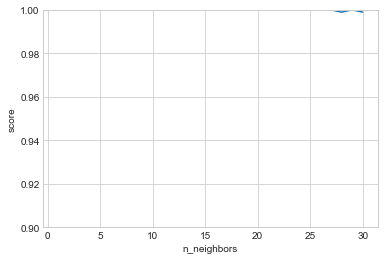

In [6]:
# K-近傍法
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 31): # K = 1~30
  # KNeighborsClassifier
  knc = KNeighborsClassifier(n_neighbors=k)
  knc.fit(X_train_std, y_train)

  # 予測　
  Y_pred = knc.predict(X_test_std)

  # 評価 R^2
  score = knc.score(X_test_std, y_test)
  print("[%d] score: {:.5f}".format(score) % k)

  list_nn.append(k)
  list_score.append(score)

# プロット
plt.ylim(0.9, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

In [9]:
knc = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knc.fit(X_train, y_train)
#print(df['label'].value_counts())
print(df.dtypes)


0      int64
1    float64
2    float64
3    float64
4    float64
dtype: object


In [11]:
pred = knc.predict(X_test)
#print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('isigaki_miyako_iriomote_wavedata/isigaki_test.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.loc[:, [1,4]].values
#print(X)
y = df.loc[:, 0].values

#データの分割（テスト用とトレーニング用）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y[0 1]:', np.bincount(y))
print('Labels counts in y_train[0 1]:', np.bincount(y_train))
print('Labels counts in y_test[0 1]:', np.bincount(y_test))

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

#knn実行
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train_std, y_train)

# 評価 R^2
score = knc.score(X_test_std, y_test)
print("[%d] score: {:.2f}".format(score) % 100)

Labels counts in y[0 1]: [4723   25]
Labels counts in y_train[0 1]: [3778   20]
Labels counts in y_test[0 1]: [945   5]
[[-0.77081914  1.38505558]
 [-1.06589257  2.52798994]
 [-0.52492461  1.52792238]
 ...
 [-0.57410352 -1.00081989]
 [ 0.55701132 -1.12940001]
 [-0.37738789  0.9564552 ]]
[100] score: 1.00


In [13]:
#グラフをプロットするための関数
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
def plot_data(X, t):
    c=1
    positive = [i for i in range(len(t)) if t[i] == 1]
    negative = [i for i in range(len(t)) if t[i] == 0]

    plt.scatter(X[positive, 0], X[positive, c], c='red', marker='o', label='Canceled')
    plt.scatter(X[negative, 0], X[negative, c], c='blue', marker='o', label='Navigation')

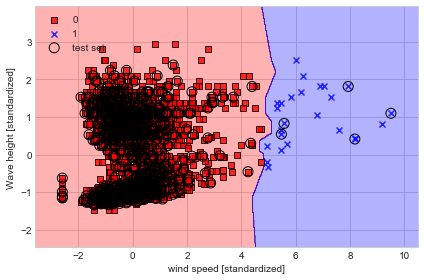

In [14]:
"""
probe=knc.predict_proba(X_test)
print(probe)
probe1=knc.predict(X_test)
plt.figure(1)
plot_data(X_test, y_test)
"""
X_combined_std = np.vstack((X_train_std, X_test_std))#結合しているのはテストデータをランダムに取得したため
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=knc, 
                      test_idx=range(3798, 4748))
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [15]:
#パイプラインの作成
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pipe_knc= make_pipeline(StandardScaler(),
                        #PCA(n_components=2),
                        KNeighborsClassifier(n_neighbors=1))

pipe_knc.fit(X_train, y_train)
y_pred = pipe_knc.predict(X_test)
print('Test Accuracy: %.3f' % pipe_knc.score(X_test, y_test))

Test Accuracy: 1.000


In [16]:
#K分割交差検証
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train_std, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_knc.fit(X_train_std[train], y_train[train])
    score = pipe_knc.score(X_train_std[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.5f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [3400   18], Acc: 1.00000
Fold:  2, Class dist.: [3400   18], Acc: 1.00000
Fold:  3, Class dist.: [3400   18], Acc: 0.99737
Fold:  4, Class dist.: [3400   18], Acc: 1.00000
Fold:  5, Class dist.: [3400   18], Acc: 1.00000
Fold:  6, Class dist.: [3400   18], Acc: 1.00000
Fold:  7, Class dist.: [3400   18], Acc: 1.00000
Fold:  8, Class dist.: [3400   18], Acc: 1.00000
Fold:  9, Class dist.: [3401   18], Acc: 1.00000
Fold: 10, Class dist.: [3401   18], Acc: 1.00000

CV accuracy: 0.99974 +/- 0.00079


In [17]:
#交差検証でのモデルの正解率
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_knc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [1.         1.         0.99736842 1.         1.         1.
 1.         1.         1.         1.        ]
CV accuracy: 1.000 +/- 0.001


[[945   0]
 [  0   5]]


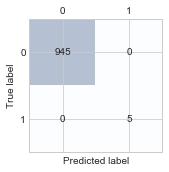

In [18]:
#混同行列
from sklearn.metrics import confusion_matrix

pipe_knc.fit(X_train, y_train)
y_pred = pipe_knc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [19]:
#適合率、再現率、F1スコア
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 1.000
Recall: 1.000
F1: 1.000


データのクラス
[1 1 1 0 0 0]
kncモデルによるデータのクラス予想
[1 1 1 0 0 0]
データそれぞれに対するクラス[0 1]の所属解率
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


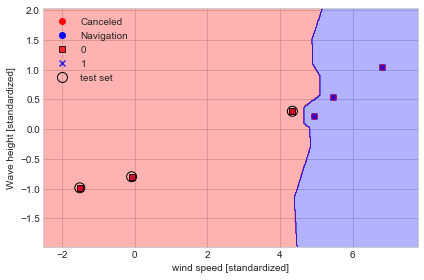

In [20]:
df1 = pd.read_csv('isigaki_miyako_iriomote_wavedata/test_1.csv', header=None)
X1 = df1.loc[:, [1,4]].values
#print(X)
y1 = df1.loc[:, 0].values
#print(y)
#y = np.where(y <= 1, 0, 1)#1は雨の合計降水量
le = LabelEncoder()
#print(y)
y1 = le.fit_transform(y1)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X1_train_pca = pca.fit_transform(X1)
X1_train_std = sc.transform(X1)
predict = knc.predict(X1_train_std)
predict_proba = knc.predict_proba(X1_train_std)

#データに対する予測確率
print('データのクラス')
print(y1)
print('kncモデルによるデータのクラス予想')
print(predict)
print('データそれぞれに対するクラス[0 1]の所属解率')
print(predict_proba)

plt.figure(1)
plot_data(X1_train_std, y1)


plot_decision_regions(X=X1_train_std, y=y1,
                      classifier=knc, test_idx=range(3, 6))#test_idx=range(105, 150)はテストデータの開始行数から終了行数まで
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [21]:
#モデルの保存
import pickle
import os
dest = os.path.join('classifier','pkl-objects')#パスの結合
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(knc,
            open(os.path.join(dest,'Near_K.pkl'),
            'wb'))#'classifier/pkl-objects/ensemble.pklで保存)